In [4]:
import warnings
warnings.filterwarnings("ignore")

import nltk
from gensim.models import word2vec
#from gensim.models.word2vec import Word2Vec

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

### Creating our sentences to train the word vectors

In [6]:
TextCorpus  = ["Alice notices a white rabbit",
               "Alice follows the rabbit down the rabbit hole",
               "Door too small for Alice",
               "Bottle reads drink me",
               "Alice meets a mouse"
]

#### Formatting for passing to word2vec

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
text_tokens = [word_tokenize(sent) for sent in TextCorpus]
text_tokens[:2]

[['Alice', 'notices', 'a', 'white', 'rabbit'],
 ['Alice', 'follows', 'the', 'rabbit', 'down', 'the', 'rabbit', 'hole']]

#### Training the word vectors

In [12]:
?word2vec.Word2Vec

In [10]:
model = word2vec.Word2Vec(text_tokens, min_count=1, seed=42)

#### Taking a look at the trained vectors

In [8]:
model.wv['Alice']

array([-1.10025948e-03, -2.38052616e-03,  7.73931097e-04,  3.82754486e-03,
        1.83823824e-04,  1.28422712e-03, -4.93822945e-03, -9.37719771e-04,
        2.34830217e-03,  1.87413476e-03,  2.38923728e-03, -3.12597514e-03,
       -1.28897850e-03, -4.56113368e-03,  3.34020401e-03, -4.59642848e-03,
       -2.34829867e-03, -1.15730648e-03, -3.52751976e-03, -4.08722507e-03,
        2.16680649e-03, -3.60529870e-03, -3.89965740e-03,  2.01266469e-03,
       -9.98557080e-04,  4.45065927e-03, -1.01780424e-04,  1.61453406e-03,
        4.57050744e-03, -2.96300440e-03, -3.07397870e-03,  3.11316876e-03,
       -7.41654439e-05, -1.23991724e-03, -2.55299639e-03, -3.90257617e-03,
        1.77634880e-04,  2.88360845e-03, -2.11577839e-03,  2.15123710e-03,
        4.17343760e-03,  4.86418651e-03,  1.28059590e-03,  4.11214726e-03,
        2.51751230e-03, -1.43945601e-03, -6.56051910e-04, -4.63480456e-03,
       -1.16360653e-03, -2.67951109e-04, -2.33123219e-03,  6.67481334e-04,
       -2.14066170e-03,  

In [9]:
len(model.wv['Alice'])

100

In [10]:
model.wv.most_similar("Alice",topn=5)

[('drink', 0.19697389006614685),
 ('too', 0.16111689805984497),
 ('a', 0.10828886926174164),
 ('mouse', 0.09715116024017334),
 ('small', 0.06045091152191162)]

### Training our word vectors on the text8 corpus
Cleaned Wikipedia text, compressed to 100MB

#### Importing the raw text file

In [14]:
sentences = word2vec.Text8Corpus('text8')

In [15]:
type(sentences)

gensim.models.word2vec.Text8Corpus

#### Using all default parameters

In [17]:
%%time
model = word2vec.Word2Vec(sentences)

Wall time: 58.9 s


In [23]:
model.wv.most_similar("news")

[('cnn', 0.7800887823104858),
 ('newspaper', 0.706696093082428),
 ('daily', 0.6832059621810913),
 ('pbs', 0.6730657815933228),
 ('bbc', 0.661893904209137),
 ('abc', 0.6617001295089722),
 ('coverage', 0.6604894399642944),
 ('newspapers', 0.6603118777275085),
 ('forum', 0.6567295789718628),
 ('weekly', 0.6559501886367798)]

In [24]:
model.wv.most_similar("happiness")

[('humanity', 0.8101158142089844),
 ('goodness', 0.7647572159767151),
 ('desires', 0.748024046421051),
 ('pleasure', 0.7388514876365662),
 ('guilt', 0.7347894906997681),
 ('compassion', 0.7330222725868225),
 ('mankind', 0.7308719754219055),
 ('dignity', 0.7287883758544922),
 ('salvation', 0.7285864949226379),
 ('fear', 0.7265817523002625)]

In [29]:
v1 = model.wv['machine']
v2 = model.wv['learning']
res = (v1+v2)/2

In [30]:
model.wv.most_similar([res])

[('machine', 0.8402273654937744),
 ('learning', 0.7512092590332031),
 ('memory', 0.6508206129074097),
 ('instruction', 0.6486309170722961),
 ('interface', 0.6441025733947754),
 ('tool', 0.6409190893173218),
 ('communication', 0.6317555904388428),
 ('programmer', 0.6254351139068604),
 ('interpreter', 0.6215000152587891),
 ('device', 0.6196221709251404)]

#### Semantic regularities captured in word embeddings

In [31]:
model.wv.most_similar(positive=['woman', 'husband'], negative=['man'], topn=5)

[('wife', 0.768734872341156),
 ('daughter', 0.7210648655891418),
 ('mother', 0.7167145013809204),
 ('child', 0.6970947980880737),
 ('grandmother', 0.6716728210449219)]

In [32]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.6606237888336182),
 ('empress', 0.6513140201568604),
 ('princess', 0.6327988505363464),
 ('prince', 0.6228598952293396),
 ('daughter', 0.5962039828300476)]

In [33]:
model.wv.most_similar(positive=['woman', 'hero'], negative=['man'], topn=5)

[('heroine', 0.6431500911712646),
 ('protagonist', 0.6128721237182617),
 ('lover', 0.6088616847991943),
 ('warrior', 0.6079815626144409),
 ('idol', 0.5993800163269043)]

#### And these regularities needn't always be the most desirable

In [34]:
model.wv.most_similar(positive=['woman', 'doctor'], negative=['man'], topn=5)

[('child', 0.6013621687889099),
 ('nurse', 0.5954213738441467),
 ('teacher', 0.5828046202659607),
 ('dominatrix', 0.582726776599884),
 ('prostitute', 0.5428712964057922)]

In [35]:
model.wv.most_similar(positive=['woman', 'smart'], negative=['man'], topn=5)

[('dumb', 0.5973577499389648),
 ('pet', 0.5935730934143066),
 ('gunslinger', 0.5774900317192078),
 ('dominatrix', 0.5764394998550415),
 ('fancy', 0.5736312866210938)]

In [37]:
model.wv.most_similar(positive=['man', 'intelligent'], negative=['woman'], topn=5)

[('rational', 0.6199946403503418),
 ('intuition', 0.5872678756713867),
 ('rationality', 0.5849977731704712),
 ('extraterrestrial', 0.5728286504745483),
 ('reality', 0.5712677240371704)]

### Visualizing these word vectors

In [40]:
X = model.wv[model.wv.vocab]

##### We'll use PCA to reduce and visualize in 2 dimensions

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

Randomly select 100 words

In [43]:
import random
random.seed(2)

In [44]:
ind = random.sample(range(0,len(X)),50)
result_random = result[ind]

In [45]:
all_words = list(model.wv.vocab)
words = [all_words[i] for i in ind]

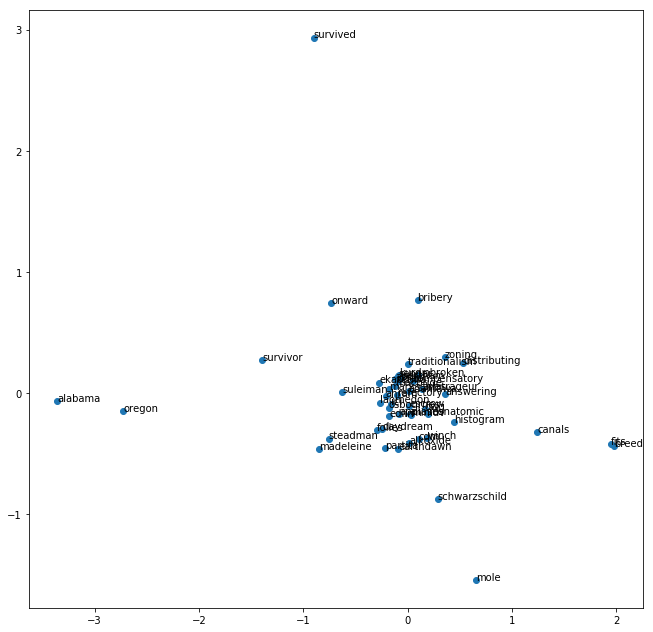

In [46]:
%matplotlib inline
plt.figure(figsize=(11,11))
plt.scatter(result_random[:, 0], result_random[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result_random[i, 0], result_random[i, 1]))
plt.show()

## Effect of vector dimension

#### Reducing the length to 50

In [47]:
%%time
model = word2vec.Word2Vec(sentences, size=50, seed =42)

Wall time: 56.3 s


In [48]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('emperor', 0.7299188375473022),
 ('empress', 0.7249405384063721),
 ('son', 0.7165752053260803),
 ('queen', 0.7119096517562866),
 ('prince', 0.6934196949005127)]

#### Inreasing vector length to 300

In [49]:
%%time
model = word2vec.Word2Vec(sentences, size = 300, seed = 42)

Wall time: 1min 30s


In [50]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.6202068328857422),
 ('princess', 0.5560327172279358),
 ('daughter', 0.5539674758911133),
 ('prince', 0.5415325164794922),
 ('elizabeth', 0.5340068340301514)]

In [51]:
model.wv.most_similar("run")

[('running', 0.6980862617492676),
 ('runs', 0.6365170478820801),
 ('compete', 0.5764539241790771),
 ('operate', 0.5763216614723206),
 ('move', 0.5715463757514954),
 ('switch', 0.5416829586029053),
 ('drive', 0.536190390586853),
 ('finish', 0.5347497463226318),
 ('ticket', 0.5300155878067017),
 ('stay', 0.5263422727584839)]

## Effect of window size

#### Increasing the window size to 20

In [52]:
%%time
model20 = word2vec.Word2Vec(sentences, size=100,window=20)

Wall time: 1min 21s


In [53]:
model20.wv.most_similar("money")

[('buying', 0.780925989151001),
 ('profits', 0.7519193887710571),
 ('taxes', 0.7228024005889893),
 ('payments', 0.7202187776565552),
 ('paid', 0.7163376212120056),
 ('pay', 0.7153226137161255),
 ('credit', 0.709079384803772),
 ('cash', 0.6947434544563293),
 ('creditors', 0.6900806427001953),
 ('payment', 0.6846361756324768)]

In [54]:
model20.wv.most_similar("queen")

[('elizabeth', 0.8220455050468445),
 ('princess', 0.7224969863891602),
 ('crown', 0.6927047967910767),
 ('prince', 0.692075252532959),
 ('monarch', 0.6618814468383789),
 ('victoria', 0.6581650972366333),
 ('king', 0.6270338892936707),
 ('consort', 0.6230613589286804),
 ('mary', 0.6200700998306274),
 ('coronation', 0.616712212562561)]

In [55]:
model20.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7191203832626343),
 ('elizabeth', 0.654670238494873),
 ('throne', 0.6169127225875854),
 ('princess', 0.6145281791687012),
 ('empress', 0.6093745231628418)]

In [56]:
model20.wv.most_similar("car")

[('driver', 0.8027411699295044),
 ('cars', 0.788783609867096),
 ('truck', 0.7207086682319641),
 ('motorcycle', 0.7014740109443665),
 ('automobile', 0.697812557220459),
 ('vehicle', 0.6831107139587402),
 ('racing', 0.6739612817764282),
 ('racer', 0.6739027500152588),
 ('volkswagen', 0.6712490320205688),
 ('jeep', 0.6700466871261597)]

#### Reducing the window size to 2

In [57]:
%%time
model2 = word2vec.Word2Vec(sentences, size=100, window=2, seed = 42)

Wall time: 1min 4s


In [58]:
model2.wv.most_similar("money")

[('royalties', 0.6770974397659302),
 ('profits', 0.6750068664550781),
 ('payment', 0.6463176012039185),
 ('buying', 0.6340569853782654),
 ('cash', 0.6313360929489136),
 ('funds', 0.6304786205291748),
 ('payments', 0.6267861127853394),
 ('credit', 0.621099591255188),
 ('compensation', 0.6206685304641724),
 ('goods', 0.6109568476676941)]

In [59]:
model2.wv.most_similar("queen")

[('princess', 0.6965975761413574),
 ('prince', 0.686797022819519),
 ('king', 0.6794460415840149),
 ('crown', 0.6616418957710266),
 ('consort', 0.6552071571350098),
 ('mary', 0.6189430952072144),
 ('bride', 0.6179883480072021),
 ('elizabeth', 0.6079295873641968),
 ('regent', 0.6058372855186462),
 ('aragon', 0.5941654443740845)]

In [60]:
model2.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.5944898724555969),
 ('prince', 0.577151894569397),
 ('kings', 0.5742230415344238),
 ('monarch', 0.5603979229927063),
 ('throne', 0.5513135194778442)]

In [61]:
model2.wv.most_similar("car")

[('cars', 0.7331576347351074),
 ('driver', 0.7064088582992554),
 ('taxi', 0.6881927251815796),
 ('motorcycle', 0.6725943088531494),
 ('boat', 0.6701037287712097),
 ('truck', 0.6544116735458374),
 ('aircraft', 0.6523904204368591),
 ('vehicle', 0.6453977823257446),
 ('bicycle', 0.6163585186004639),
 ('airplane', 0.6138440370559692)]

## Skip gram vs CBOW

Simply put, the CBOW model learns the embedding by predicting the current word based on its context. The skip-gram model learns by predicting the surrounding words given a current word.

#### Using the CBOW method (default)

In [62]:
%%time
model = word2vec.Word2Vec(sentences, size=100, seed = 42)

Wall time: 1min 1s


In [63]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.682964563369751),
 ('throne', 0.6320975422859192),
 ('prince', 0.6246257424354553),
 ('empress', 0.62110835313797),
 ('son', 0.5979068279266357)]

In [64]:
model.wv.most_similar("meandering")

[('projecting', 0.7326324582099915),
 ('troughs', 0.7085111141204834),
 ('sloping', 0.7078056335449219),
 ('flowing', 0.6970741748809814),
 ('steep', 0.6895877718925476),
 ('featureless', 0.6889464855194092),
 ('undulating', 0.6799795627593994),
 ('merges', 0.6749551296234131),
 ('sinuous', 0.6738845109939575),
 ('concentric', 0.673874020576477)]

#### Using Skipgram method

In [65]:
%%time
model_sg = word2vec.Word2Vec(sentences, size=100,sg=1)

Wall time: 3min 35s


In [66]:
model_sg.wv.most_similar("meandering")

[('sinuous', 0.9114779829978943),
 ('basaltic', 0.9056195020675659),
 ('undulating', 0.9049124717712402),
 ('uplifted', 0.8970229625701904),
 ('troughs', 0.8926218748092651),
 ('tableland', 0.8904924392700195),
 ('wadis', 0.8893045783042908),
 ('buttes', 0.8881261348724365),
 ('abyssal', 0.8869340419769287),
 ('crescentic', 0.8862241506576538)]

#### Learning:

This turns out to learn finer-grained vectors when one trains over more data. The main reason is that the CBOW smooths over a lot of the distributional statistics by averaging over all context words while the skipgram does not. With little data, this "regularizing" effect of the CBOW turns out to be helpful, but since data is the ultimate regularizer the skipgram is able to extract more information when more data is available.

## Word vectors trained on different contexts
 - We'll load different corpora, from different contexts and see how the embeddings vary
 - The text8 corpus is wikipedia pages, while Brown corpus is from 15 different topics, and movie reviews are from IMDB

In [67]:
from nltk.corpus import brown, movie_reviews

In [68]:
model_brown = word2vec.Word2Vec(brown.sents(), sg=1)
model_movie = word2vec.Word2Vec(movie_reviews.sents(), sg=1, window=5)

In [69]:
model_sg.wv.most_similar('money', topn=5)

[('credit', 0.7705346345901489),
 ('dividends', 0.7592810392379761),
 ('dues', 0.7532870173454285),
 ('repay', 0.7520968914031982),
 ('profits', 0.7460830807685852)]

In [70]:
model_brown.wv.most_similar('money', topn=5)

[('job', 0.847070574760437),
 ('friendship', 0.8414795994758606),
 ('care', 0.8375280499458313),
 ('chances', 0.824509859085083),
 ('permission', 0.8238842487335205)]

In [71]:
model_movie.wv.most_similar('money', topn=5)

[('cash', 0.74306321144104),
 ('ransom', 0.7157845497131348),
 ('risk', 0.6962698698043823),
 ('paid', 0.6931880712509155),
 ('record', 0.6931635737419128)]

 
I hope it’s pretty clear from the above examples that the semantic similarity of words can vary greatly depending on the textual context. 

## Using pre-trained word vectors

### A quick note on Glove:
   - Developed by Stanford by training on 6 Billion tokens
   - Objective is slightly different
   - End result very similar to Google's word2vec

https://nlp.stanford.edu/projects/glove/

- We'll use the 100D vectors for this example.
- The trained vectors are available in a text file
- The format is slightly different from that of word2vec, necessitating the use of a utility to format accordingly

In [72]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.w2vformat.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [73]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("glove.6B.100d.w2vformat.txt", binary=False)

#### Now you can use all the methods you used with word2vec models

In [74]:
glove_model.most_similar("king")

[('prince', 0.7682329416275024),
 ('queen', 0.7507690787315369),
 ('son', 0.7020887732505798),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.691999077796936),
 ('kingdom', 0.6811410188674927),
 ('father', 0.680202841758728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

In [75]:
glove_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755737066268921),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520533561706543)]

In [76]:
glove_model.most_similar(positive=['woman', 'doctor'], negative=['man'], topn=5)

[('nurse', 0.7735227346420288),
 ('physician', 0.7189429998397827),
 ('doctors', 0.6824328303337097),
 ('patient', 0.6750683188438416),
 ('dentist', 0.6726033687591553)]

In [77]:
glove_model.most_similar(positive=['woman', 'manager'], negative=['man'], topn=5)

[('assistant', 0.6566410064697266),
 ('job', 0.6263916492462158),
 ('supervisor', 0.5934786796569824),
 ('owner', 0.5878321528434753),
 ('hired', 0.5773900747299194)]

In [78]:
glove_model.most_similar(positive=['woman', 'smart'], negative=['man'], topn=5)

[('intelligent', 0.6548852324485779),
 ('sexy', 0.597896933555603),
 ('sophisticated', 0.5743618011474609),
 ('mom', 0.5572563409805298),
 ('cute', 0.5498133301734924)]